In [389]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as k
from keras.datasets import mnist

In [547]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [311]:
print('Train:X=%s,y=%s' %(x_train.shape,y_train.shape))

Train:X=(60000, 28, 28),y=(60000,)


In [312]:
print('Test:X=%s,y=%s'%(x_test.shape,y_test.shape))

Test:X=(10000, 28, 28),y=(10000,)


Plot first few images

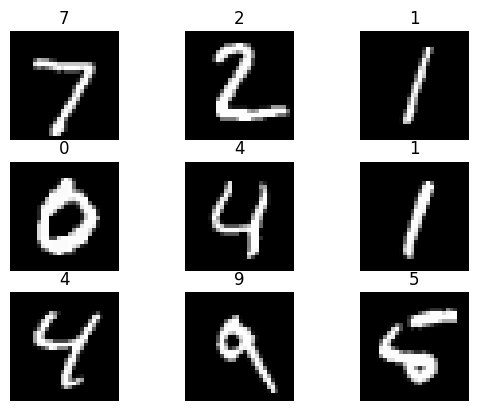

In [391]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.title(y_test[i])
    plt.axis('off')
                                         
 

Prepare the image dataset
Here is a basic approach to applying a CNN on the MNIST dataset using the Python programming language and the Keras library:
1.Load and preprocess the data: The MNIST dataset can be loaded using the Keras library, and the images can be normalized to have pixel values between 0 and 1.
2.Define the model architecture: The CNN can be constructed using the Keras Sequential API, which allows for easy building of sequential models layer-by-layer. The architecture should typically include convolutional layers, pooling layers, and fully-connected layers.
3.Compile the model: The model needs to be compiled with a loss function, an optimizer, and a metric for evaluation.
4.Train the model: The model can be trained on the training set using the Keras fit() function. It is important to monitor the training accuracy and loss to ensure the model is converging properly.
5.Evaluate the model: The trained model can be evaluated on the test set using the Keras evaluate() function. The evaluation metric typically used for classification tasks is accuracy.

Reshape the dataset to have single channel

In [392]:
x_train.shape[0]

60000

In [393]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)

In [394]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [317]:
help(keras.utils.to_categorical)

Help on function to_categorical in module keras.src.utils.numerical_utils:

to_categorical(x, num_classes=None)
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with `categorical_crossentropy`.
    
    Args:
        x: Array-like with class values to be converted into a matrix
            (integers from 0 to `num_classes - 1`).
        num_classes: Total number of classes. If `None`, this would be inferred
            as `max(x) + 1`. Defaults to `None`.
    
    Returns:
        A binary matrix representation of the input as a NumPy array. The class
        axis is placed last.
    
    Example:
    
    >>> a = keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
    >>> print(a)
    [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]
    
    >>> b = np.array([.9, .04, .03, .03,
    ...               .3, .45, .15, .13,
    ...               .04, .01, .94, .05,
    ...               .12, .21, .5, .17],
    ...              

In [395]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

# Prepare pixel data
we should normalize the pixel values of grayscale image and rescale them to be in range 0 to 1

In [396]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

Define Model
Explanation of the working of each layer in the CNN model:
layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3).
layer2 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3).
layer3 is the MaxPooling2D layer which picks the max value out of a matrix of size (3*3).
layer4 is showing Dropout at a rate of 0.5.
layer5 is flattening the output obtained from layer4 and this flattens output is passed to layer6.
layer6 is a hidden layer of a neural network containing 250 neurons.
layer7 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

In [320]:
from tensorflow.keras.models import Sequential

In [321]:
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D, MaxPooling2D,Input,BatchNormalization

In [322]:
model=Sequential()

In [323]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=((3,3))))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compile the Model


In [324]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=10)

In [ ]:
loss=model.history.history['loss']

In [ ]:
import seaborn as sns
sns.lineplot(x=range(len(loss)),y=loss)
plt.title('Training loss per epoch')

In [ ]:
model.metrics_names

In [ ]:
model.save('final_model_digit.h5')

# How To make Prediction
1.load the image
2.convert the image to array
3.reshape the single sample with 1-channel
4.prepare the pixel data
5.make prediction

In [ ]:
from keras.models import load_model
from numpy import argmax
import cv2
import numpy as np
from numpy import argmax


In [ ]:
model=load_model('final_model_digit.h5')

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [556]:
def predict(filename):
    img=cv2.imread(filename,0)
    img=cv2.resize(img,(28,28))
    img=np.asarray(img)
    img=img.astype('float32')
    img=img/255.0
    img=np.expand_dims(img,axis=0)
    img=np.vstack([img])
    img=np.reshape(img,(1,28,28))
    model=load_model('final_model_digit.h5')
    pred=model.predict(img)
    digit=argmax(pred)
    
    return digit
    
    

Let us do some optimization task

1.Batch Normalization

In [ ]:
model_1=Sequential()

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:

model_1.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_1.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=((3,3))))
model_1.add(Dropout(0.5))
model_1.add(Flatten())
model_1.add(Dense(250,activation='relu'))
model_1.add(Dense(100,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(10,activation='softmax'))


In [ ]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_1.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=10)

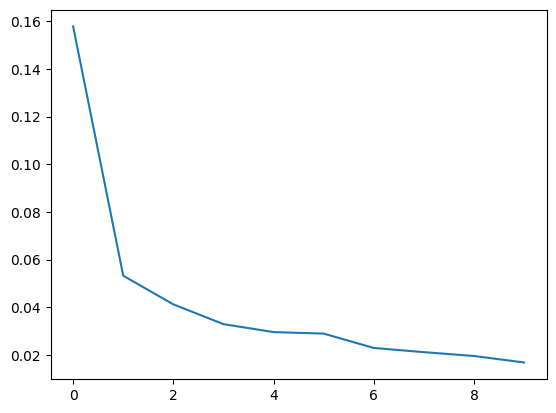

In [647]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.show()

In [ ]:
model_1.save('improved_model.h5')

In [557]:
def predict_1(filename):
    img=cv2.imread(filename,0)
    img=cv2.resize(img,(28,28))
    img=np.asarray(img)
    img=img.astype('float32')
    img=img/255.0
    img=np.expand_dims(img,axis=0)
    img=np.vstack([img])
    img=np.reshape(img,(1,28,28))
    model=load_model('improved_model.h5')
    pred=model.predict(img)
    digit=argmax(pred)
    
    return digit
    
    

2. Imporve the model depth

In [397]:
model_2=Sequential()

In [398]:
model_2.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_2.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_2.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_2.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=((3,3))))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(250,activation='relu'))
model_2.add(Dense(100,activation='relu'))
model_2.add(Dense(100,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(10,activation='softmax'))


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [399]:
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [400]:
model_2.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 162ms/step - accuracy: 0.8902 - loss: 0.3547 - val_accuracy: 0.1683 - val_loss: 7.7913
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.2091 - val_loss: 10.6033
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 213ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.1031 - val_loss: 25.1746
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 210ms/step - accuracy: 0.9907 - loss: 0.0318 - val_accuracy: 0.2111 - val_loss: 18.6565
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 200ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.0900 - val_loss: 42.2040
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 208ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.1369 - val_loss: 38.6473
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.3140 - val_loss: 12.4589
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 199ms/step - accuracy: 0.9928 - 

In [401]:
model_2.save('final.h5')

<Axes: >

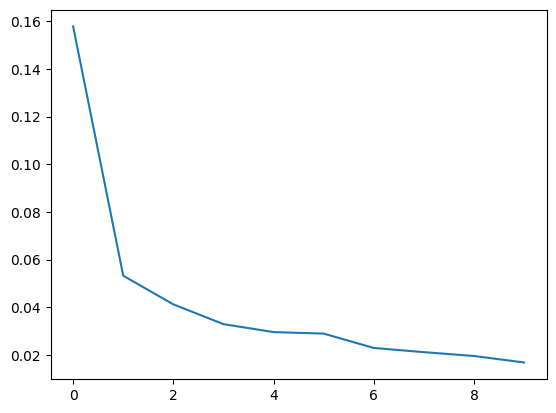

In [402]:
loss=model_2.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [558]:
def predict_2(filename):
    img=cv2.imread(filename,0)
    img=cv2.resize(img,(28,28))
    img=np.asarray(img)
    img=img.astype('float32')
    img=img/255.0
    img=np.expand_dims(img,axis=0)
    img=np.vstack([img])
    img=np.reshape(img,(1,28,28))
    model=load_model('final.h5')
    pred=model.predict(img)
    digit=argmax(pred)
    
    return digit
    
    

value-0:-only the first model with predict correctly predkict the value

value 1-All three models don't predict correctly for 1_test

value 2:- All three model predict correctly

value 3:- only the first model predict correctly, both the revised model predict incoprrectly

value 4:- all model predict incorrectly

value 5: all model predict correctly

valu 6: only the first model predict correctly, both the revised model predict incorrectly

value 7:- all model predict incorrectly

value 8:-only the first model predict correctly

value 9:-only the first model predict correctly

Remark: we the use of adding model depth as well as BatchNormalization, we get an accuracy of 0.9950 and loss 0.0150